In [114]:
#import all libraries 
import pandas as pd
import numpy as np
from lightgbm.sklearn import LGBMClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder


In [69]:
# read the dataset using the compression zip
df_006 = pd.read_csv('data/corona_tested_individuals_ver_006.english.csv.zip',compression='zip')
df_006.head()

c:\python3.7.3\lib\site-packages\IPython\core\interactiveshell.py:3173: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


In [4]:
df_0083 = pd.read_csv('data/corona_tested_individuals_ver_0083.english.csv')
df_0083.head()

c:\python3.7.3\lib\site-packages\IPython\core\interactiveshell.py:3173: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


In [7]:
df_006.dtypes

test_date              object
cough                  object
fever                  object
sore_throat            object
shortness_of_breath    object
head_ache              object
corona_result          object
age_60_and_above       object
gender                 object
test_indication        object
dtype: object

In [8]:
df_006.info

<bound method DataFrame.info of          test_date cough fever sore_throat shortness_of_breath head_ache  \
0       2020-04-30     0     0           0                   0         0   
1       2020-04-30     1     0           0                   0         0   
2       2020-04-30     0     1           0                   0         0   
3       2020-04-30     1     0           0                   0         0   
4       2020-04-30     1     0           0                   0         0   
...            ...   ...   ...         ...                 ...       ...   
278843  2020-03-11     0     0           0                   0         0   
278844  2020-03-11     0     0           0                   0         0   
278845  2020-03-11     0     0           0                   0         0   
278846  2020-03-11     0     0           0                   0         0   
278847  2020-03-11     0     0           0                   0         0   

       corona_result age_60_and_above  gender         t

In [10]:
df_006_train_val = df_006.loc[(df_006['test_date'] >= '2020-03-22') & (df_006['test_date'] <= '2020-03-31')]
df_006_train_val.info

<bound method DataFrame.info of          test_date cough fever sore_throat shortness_of_breath head_ache  \
211278  2020-03-31     0     0           0                   0         0   
211279  2020-03-31     0     0           0                   0         0   
211280  2020-03-31     0     0           0                   0         0   
211281  2020-03-31     0     0           0                   0         0   
211282  2020-03-31     1     0           0                   0         0   
...            ...   ...   ...         ...                 ...       ...   
265116  2020-03-22     1     1           0                   0         0   
265117  2020-03-22     1     1           1                   0         1   
265118  2020-03-22     1     0           0                   0         0   
265119  2020-03-22     1     0           0                   0         0   
265120  2020-03-22     1     0           0                   0         0   

       corona_result age_60_and_above  gender test_indi

In [16]:
df_006['test_date'] = pd.to_datetime(df_006['test_date'], format='%Y-%m-%d')
df_006_train_val = df_006.loc[(df_006['test_date'] >= '2020-03-22') & (df_006['test_date'] <= '2020-03-31')]
df_006_train_val.info

<bound method DataFrame.info of         test_date cough fever sore_throat shortness_of_breath head_ache  \
211278 2020-03-31     0     0           0                   0         0   
211279 2020-03-31     0     0           0                   0         0   
211280 2020-03-31     0     0           0                   0         0   
211281 2020-03-31     0     0           0                   0         0   
211282 2020-03-31     1     0           0                   0         0   
...           ...   ...   ...         ...                 ...       ...   
265116 2020-03-22     1     1           0                   0         0   
265117 2020-03-22     1     1           1                   0         1   
265118 2020-03-22     1     0           0                   0         0   
265119 2020-03-22     1     0           0                   0         0   
265120 2020-03-22     1     0           0                   0         0   

       corona_result age_60_and_above  gender test_indication  
211

In [24]:
nan_in_data = df_006.isna().sum().any()
nan_in_data

False

In [34]:
df_006.columns


Index(['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache', 'corona_result', 'age_60_and_above', 'gender',
       'test_indication'],
      dtype='object')

In [70]:
pd.unique(df_006['cough'])


array([0, 1, '0', '1', 'None'], dtype=object)

In [88]:
num_columns = ['cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache']
for i in num_columns:
    df_006 = df_006[df_006[i] != 'None']
    print (pd.unique(df_006[i]))
df_006[num_columns] = df_006[num_columns].apply(pd.to_numeric)
df_006[num_columns] .dtypes

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


cough                  int64
fever                  int64
sore_throat            int64
shortness_of_breath    int64
head_ache              int64
dtype: object

In [89]:
df_006.info

<bound method DataFrame.info of          test_date  cough  fever  sore_throat  shortness_of_breath  head_ache  \
0       2020-04-30      0      0            0                    0          0   
1       2020-04-30      1      0            0                    0          0   
2       2020-04-30      0      1            0                    0          0   
3       2020-04-30      1      0            0                    0          0   
4       2020-04-30      1      0            0                    0          0   
...            ...    ...    ...          ...                  ...        ...   
278843  2020-03-11      0      0            0                    0          0   
278844  2020-03-11      0      0            0                    0          0   
278845  2020-03-11      0      0            0                    0          0   
278846  2020-03-11      0      0            0                    0          0   
278847  2020-03-11      0      0            0                    0          0

In [92]:
cat_columns = ['corona_result', 'age_60_and_above', 'gender',
       'test_indication']

In [93]:
for i in cat_columns:
    df_006 = df_006[df_006[i] != 'None']
    print (pd.unique(df_006[i]))

['negative' 'positive' 'other']
['Yes' 'No']
['male' 'female']
['Other' 'Abroad' 'Contact with confirmed']


In [95]:
df_006 = df_006[df_006['corona_result'] != 'other']
df_006 = y.map({"no": 0, "yes": 1})

In [96]:
df_006_train_val = df_006.loc[(df_006['test_date'] >= '2020-03-22') & (df_006['test_date'] <= '2020-03-31')]
df_006_train_val.info

<bound method DataFrame.info of          test_date  cough  fever  sore_throat  shortness_of_breath  head_ache  \
211278  2020-03-31      0      0            0                    0          0   
211279  2020-03-31      0      0            0                    0          0   
211280  2020-03-31      0      0            0                    0          0   
211281  2020-03-31      0      0            0                    0          0   
211282  2020-03-31      1      0            0                    0          0   
...            ...    ...    ...          ...                  ...        ...   
265116  2020-03-22      1      1            0                    0          0   
265117  2020-03-22      1      1            1                    0          1   
265118  2020-03-22      1      0            0                    0          0   
265119  2020-03-22      1      0            0                    0          0   
265120  2020-03-22      1      0            0                    0          0

In [97]:
for i in df_006.columns:
    print (pd.unique(df_006[i]))

['2020-04-14' '2020-04-13' '2020-04-12' '2020-04-11' '2020-04-10'
 '2020-04-09' '2020-04-08' '2020-04-07' '2020-04-06' '2020-04-05'
 '2020-04-04' '2020-04-03' '2020-04-02' '2020-04-01' '2020-03-31'
 '2020-03-30' '2020-03-29' '2020-03-28' '2020-03-27' '2020-03-26'
 '2020-03-25' '2020-03-24' '2020-03-23' '2020-03-22']
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
['negative' 'positive']
['Yes' 'No']
['male' 'female']
['Other' 'Abroad' 'Contact with confirmed']


In [99]:
df_006.drop(['test_date'], axis=1, inplace=True)

In [ ]:
df_006 = df_006

In [110]:
def train_lgbm(X_train, X_test, y_train, y_test, categorical_features):
    
    categorical_encoder = OneHotEncoder(handle_unknown='ignore')
    
    """numerical_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='mean'))
    ])"""

    preprocessing = ColumnTransformer(
        [('cat', categorical_encoder, categorical_features)])

    lgbm = Pipeline([
        ('preprocess', preprocessing),
        ('classifier', LGBMClassifier(class_weight="balanced", n_jobs=-1))
    ])

    lgbm.fit(X_train, y_train)
    
    print("LightGBM train accuracy: %0.3f" % lgbm.score(X_train, y_train))
    print("LightGBM test accuracy: %0.3f" % lgbm.score(X_test, y_test))
    print("LightGBM balanced test accuracy: %0.3f" % balanced_accuracy_score(y_test, lgbm.predict(X_test)))
    
    return lgbm

In [102]:
y = df_006["corona_result"]
y = y.map({"negative":0, "positive" : 1})
y

122808    0
122809    1
122810    0
122811    0
122812    0
         ..
265116    0
265117    0
265118    0
265119    0
265120    0
Name: corona_result, Length: 136294, dtype: int64

In [103]:
df_006.columns

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'corona_result', 'age_60_and_above', 'gender', 'test_indication'],
      dtype='object')

In [105]:
X = df_006.drop(['corona_result'], axis = 1)
categorical_features = X.columns
categorical_features

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'age_60_and_above', 'gender', 'test_indication'],
      dtype='object')

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [115]:
lgbm = train_lgbm(X_train, X_test, y_train, y_test, categorical_features)


LightGBM train accuracy: 0.901
LightGBM test accuracy: 0.903
LightGBM balanced test accuracy: 0.868


In [120]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, _ = roc_curve(y_test, lgbm.predict_proba(X_test)[:,1])
roc_auc= auc(fpr, tpr)
print(roc_auc)

0.9222153458041454


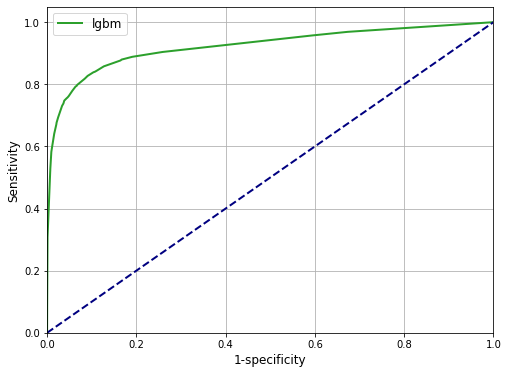

In [126]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr, tpr, color='C2',
         lw=lw, label='lgbm')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, ls='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.grid(visible=True)
plt.xlabel('1-specificity', fontsize=12)
plt.ylabel('Sensitivity', fontsize=12)
plt.legend(fontsize=12)

plt.show()

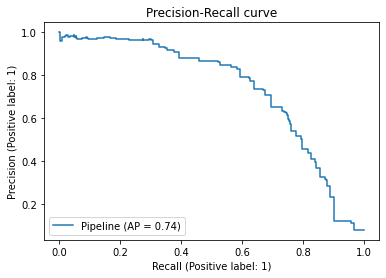

In [122]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    lgbm, X_test, y_test, 
)
_ = display.ax_.set_title("Precision-Recall curve")